In [10]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from tqdm.autonotebook import tqdm
import wandb

In [2]:
pd.options.display.max_rows = 150

In [3]:
api = wandb.Api(timeout=20)

In [4]:
filters = {
    "state": "finished"
}

# runs = api.runs("flow-graphs-cmu/flow_graphs-code", filters=filters)


## re-run risec and chemu
# sweeps = [
#     "zt62jnek", # RISEC multiseed, all. fewshot 1-10
#     "2fvdobq5", #  RISEC single seed, fewshot 1-10
#     "v57twc84", # RISEC AMR only, multiseed, fewshot 1-10
#     "cb3sa5r1", # Chemu multiseed, AMR only. fewshot 1-50. 
#     "d7163mab" # Chemu multiseed, all. fewshot 1-50
# ]

# from-scratch sweep
sweeps = ["40h94d3l", "lcb73fck", "3oh0rbcd", "eomd5a2e"]


runs = []
for sweep_id in sweeps:
    sweep = api.sweep(f"flow-graphs-cmu/narrative-flow-simplified/{sweep_id}")
    runs.extend(sweep.runs)

In [5]:
df_dicts = []

for run in tqdm(runs):
    try:
        test_f1  = run.history(keys=["test_f1"], pandas=False)[0]["test_f1"]
        df_dicts.append({**run.config, "test_f1": test_f1})
    except:
        continue

results_df = pd.DataFrame(df_dicts)

100%|██████████| 144/144 [00:31<00:00,  4.57it/s]


In [6]:
results_df

,lr,gnn,case,seed,epochs,fewshot,patience,base_path,gnn_depth,batch_size,...,wandb_project,use_graph_data,checkpoint_folder,experiment_config,graph_data_source,graph_connection_type,grad_accumulation_steps,train_dataset_instances,train_dataset_instance_hash,test_f1
0,0.00002,rgcn,dep_residual,2,30,100,5,/home/sgururaj/src/flow_graphs/,4,4,...,narrative-flow-simplified,True,/home/sgururaj/src/flow_graphs/checkpoints,dep_residual,dep,residual,1,"[3619, 1152, 2713, 516, 2681, 1125, 2090, 2865...",-7181305545752703268,0.723839
1,0.00002,rgcn,dep_residual,1,30,100,5,/home/sgururaj/src/flow_graphs/,4,4,...,narrative-flow-simplified,True,/home/sgururaj/src/flow_graphs/checkpoints,dep_residual,dep,residual,1,"[2573, 1931, 1063, 837, 515, 1178, 1073, 661, ...",-6184697335117306283,0.812458
2,0.00002,rgcn,dep_residual,0,30,100,5,/home/sgururaj/src/flow_graphs/,4,4,...,narrative-flow-simplified,True,/home/sgururaj/src/flow_graphs/checkpoints,dep_residual,dep,residual,1,"[2747, 236, 10, 2544, 1337, 3026, 3329, 2949, ...",8172644407290843094,0.773820
3,0.00002,rgcn,dep_residual,2,30,50,5,/home/sgururaj/src/flow_graphs/,4,4,...,narrative-flow-simplified,True,/home/sgururaj/src/flow_graphs/checkpoints,dep_residual,dep,residual,1,"[2188, 448, 2658, 1523, 2061, 1076, 2212, 2997...",1680451459040988611,0.681381
4,0.00002,rgcn,dep_residual,1,30,50,5,/home/sgururaj/src/flow_graphs/,4,4,...,narrative-flow-simplified,True,/home/sgururaj/src/flow_graphs/checkpoints,dep_residual,dep,residual,1,"[3047, 94, 2349, 2623, 3262, 2170, 3318, 1716,...",6802301093093120722,0.708575
5,0.00002,rgcn,dep_residual,0,30,50,5,/home/sgururaj/src/flow_graphs/,4,4,...,narrative-flow-simplified,True,/home/sgururaj/src/flow_graphs/checkpoints,dep_residual,dep,residual,1,"[3094, 81, 1596, 1744, 2107, 2326, 2800, 1365,...",1698957370637388999,0.681802
6,0.00002,rgcn,dep_residual,2,30,10,5,/home/sgururaj/src/flow_graphs/,4,4,...,narrative-flow-simplified,True,/home/sgururaj/src/flow_graphs/checkpoints,dep_residual,dep,residual,1,"[1633, 2997, 2387, 1298, 253, 1844, 2834, 1105...",4820892563299068199,0.524796
7,0.00002,rgcn,dep_residual,1,30,10,5,/home/sgururaj/src/flow_graphs/,4,4,...,narrative-flow-simplified,True,/home/sgururaj/src/flow_graphs/checkpoints,dep_residual,dep,residual,1,"[2250, 1291, 2258, 2721, 1459, 1998, 353, 2158...",1916580800192081854,0.523644
8,0.00002,rgcn,dep_residual,0,30,10,5,/home/sgururaj/src/flow_graphs/,4,4,...,narrative-flow-simplified,True,/home/sgururaj/src/flow_graphs/checkpoints,dep_residual,dep,residual,1,"[3356, 1508, 1257, 668, 265, 82, 2129, 2647, 9...",-6646671496631497073,0.514211
9,0.00002,rgcn,dep_residual,2,30,1,5,/home/sgururaj/src/flow_graphs/,4,4,...,narrative-flow-simplified,True,/home/sgururaj/src/flow_graphs/checkpoints,dep_residual,dep,residual,1,"[1283, 3484, 2444, 1916, 293, 480, 1863, 355, ...",4781860793395220847,0.217062


In [7]:
dataset_name_mapping = {
    "risec": "RISeC",
    "japflow": "English Flow Graphs",
    "chemu": "Chemical Patents",
    "mscorpus": "Materials Science",
}

In [8]:
results_df.shape

(139, 27)

In [27]:
src_datset = "mscorpus"
tgt_dataset = "risec"

df = results_df[(results_df["src_dataset"] == src_dataset) & (results_df["tgt_dataset"] == tgt_dataset)].groupby(["fewshot", "case"])["test_f1"].aggregate(["mean", "std"]).unstack(1)
df["mean"]["plaintext"]

fewshot
1      0.261064
10     0.535515
50     0.713394
100    0.757034
Name: plaintext, dtype: float64

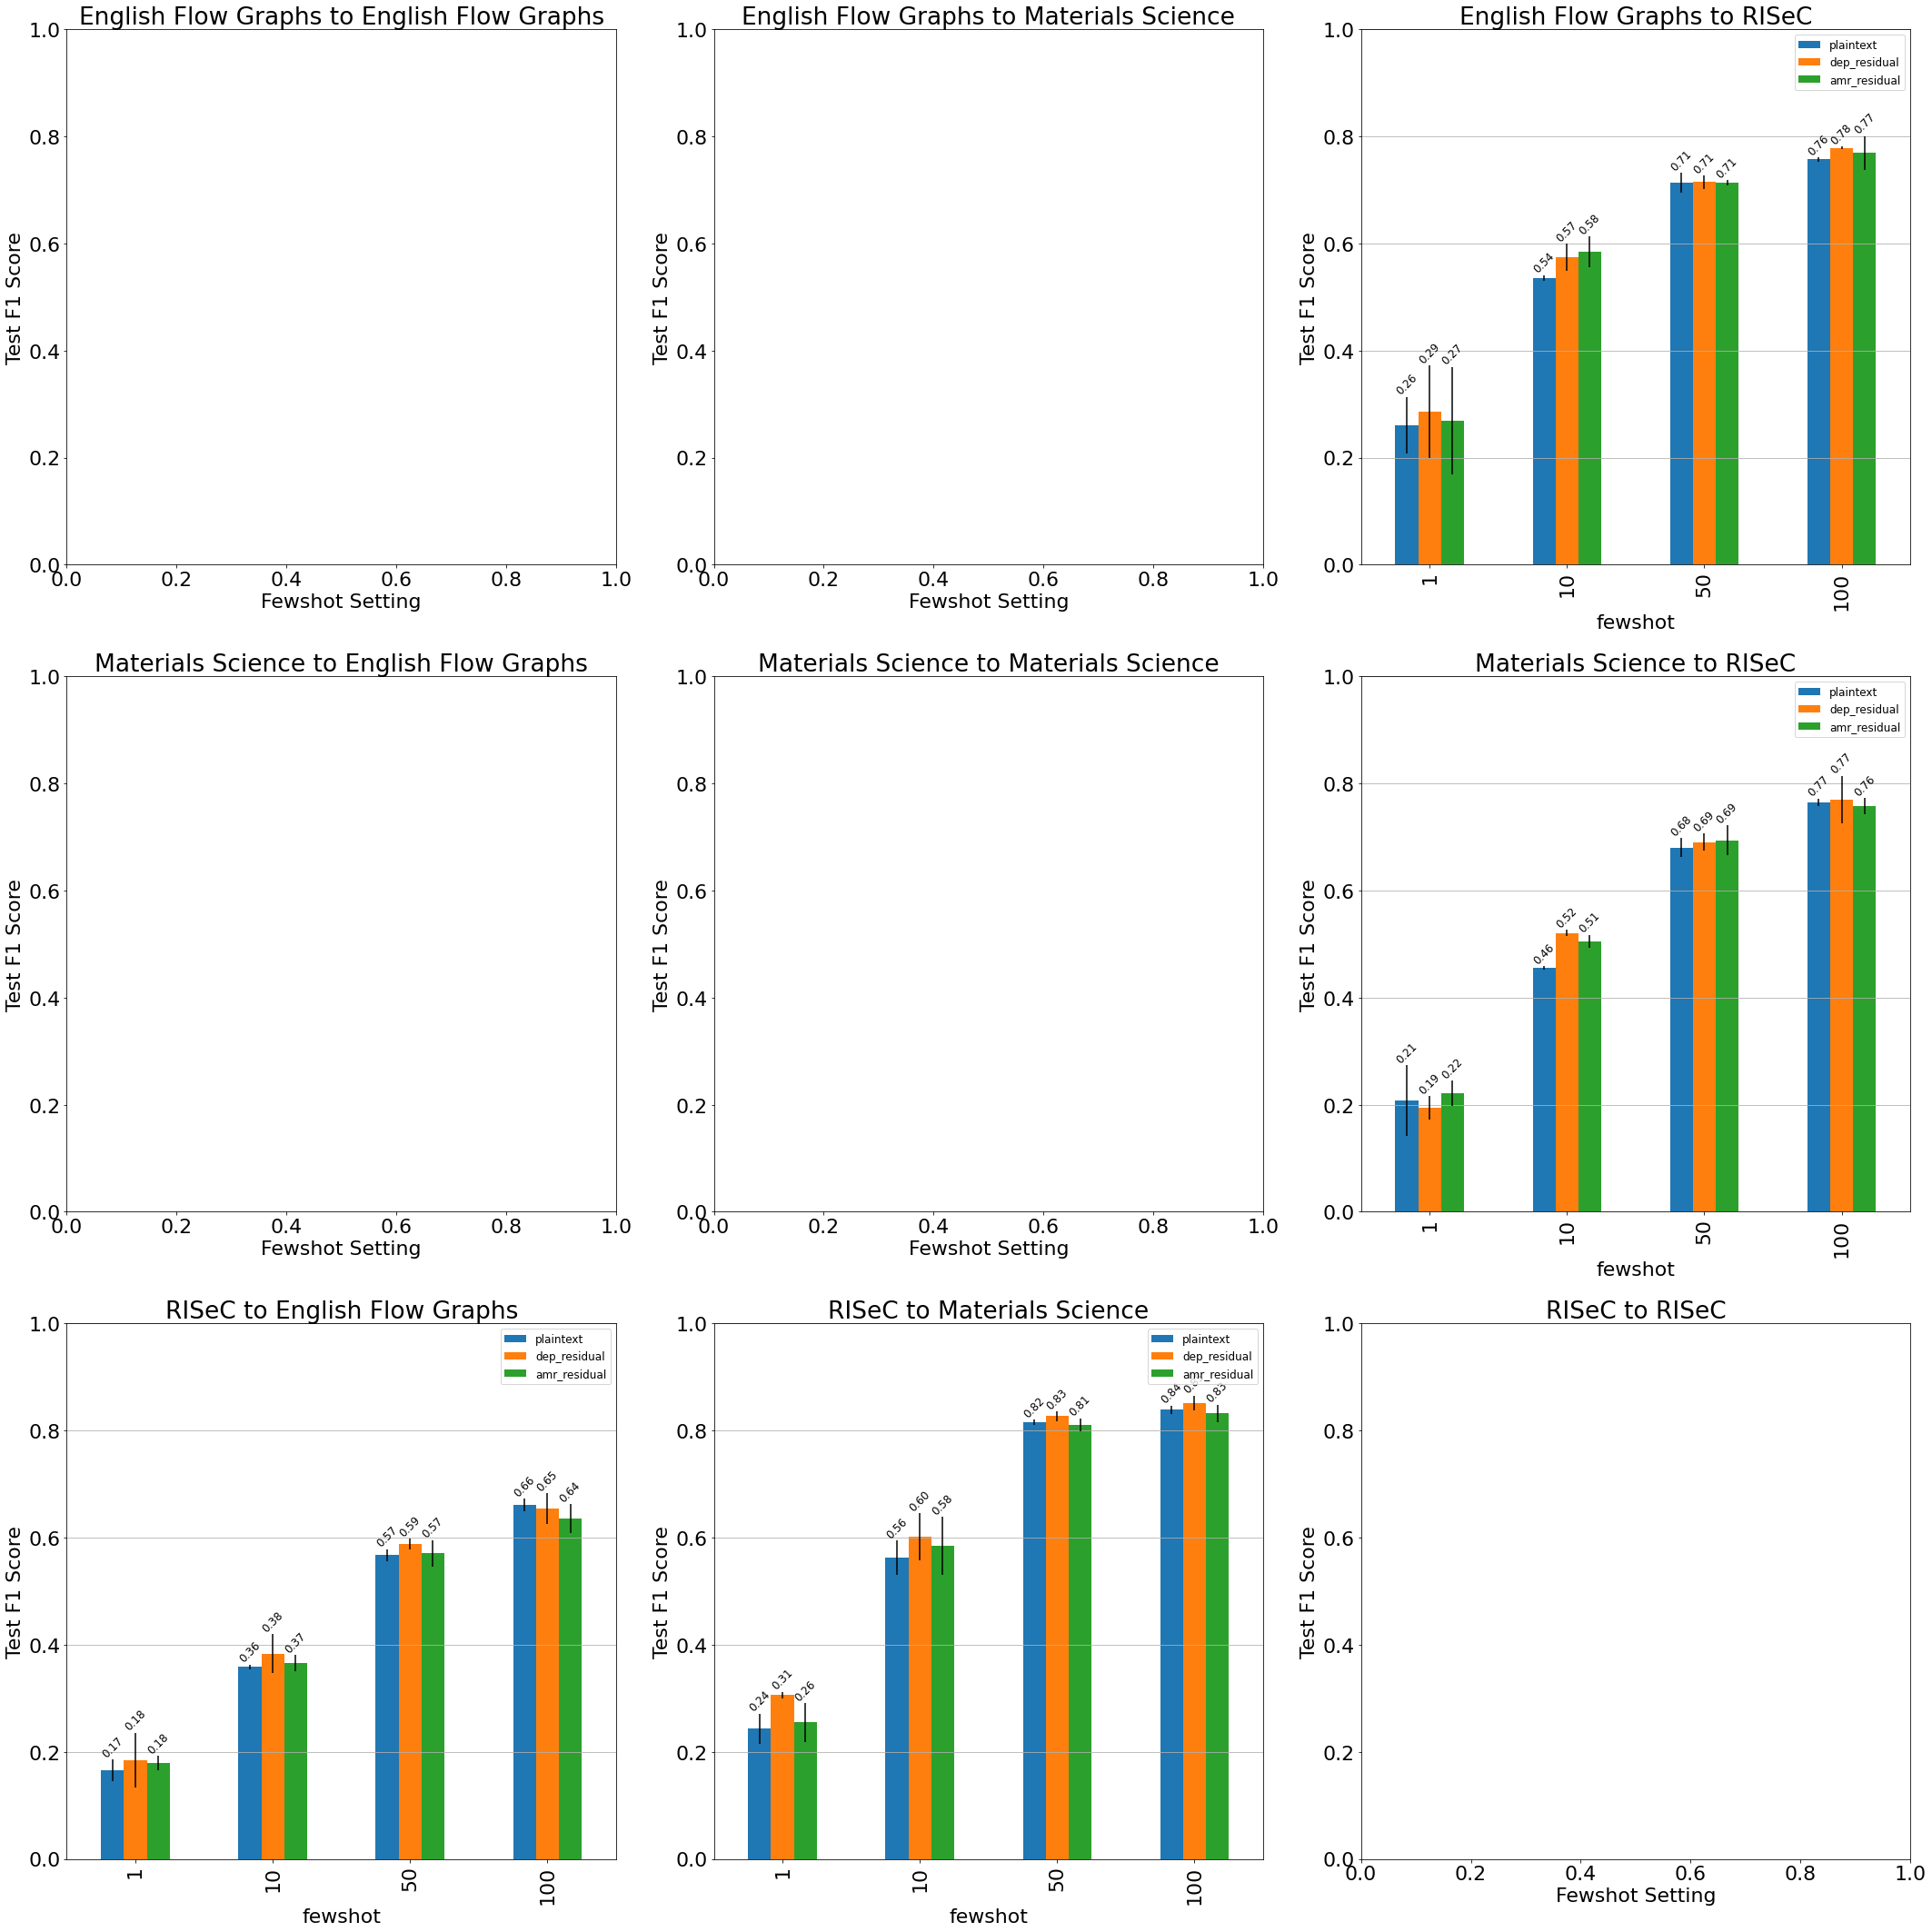

In [32]:
matplotlib.rcParams.update({'font.size': 22})

src_datasets = set(results_df["src_dataset"])
tgt_datasets = set(results_df["tgt_dataset"])

fig, axes = plt.subplots(len(tgt_datasets),len(src_datasets), figsize=(len(src_datasets) * 10, len(tgt_datasets) * 10), tight_layout=True)
ax_iter = iter(axes.reshape([-1]))

for src_dataset in sorted(src_datasets):
    for i, tgt_dataset in enumerate(sorted(tgt_datasets)):
        ax = next(ax_iter)

        ax.set_title(f"{dataset_name_mapping[src_dataset]} to {dataset_name_mapping[tgt_dataset]}")
        ax.set_ylim(0, 1)
        ax.set_xlabel("Fewshot Setting")
        ax.set_ylabel("Test F1 Score")
        if src_dataset == tgt_dataset:
            continue
        results_viz = results_df[(results_df["src_dataset"] == src_dataset) & (results_df["tgt_dataset"] == tgt_dataset)].groupby(["fewshot", "case"])["test_f1"].aggregate(["mean", "std"]).unstack(1)
        if len(results_viz) == 0:
            continue
        graph = results_viz["mean"][["plaintext", "dep_residual", "amr_residual"]].plot.bar(ax=ax, yerr=results_viz["std"])
        graph.grid(axis="y", which="both")

        ax.legend(fontsize=12)


        for bars in ax.containers:
            try:
                ax.bar_label(bars, fmt="%2.2f", rotation=45, fontsize=12)
            except:
                pass


In [10]:
unstacked = results_df.groupby(["tgt_dataset", "fewshot", "seed", "case"])["test_f1"].mean().unstack(-1)
unstacked

case                      amr_residual  dep_residual  plaintext
tgt_dataset fewshot seed                                       
japflow     0.01    0         0.310130      0.316285   0.296662
                    1         0.363508      0.338757   0.365943
                    2         0.263151      0.284150   0.289538
            0.05    0         0.570229      0.564407   0.559350
                    1         0.619466      0.613546   0.588607
                    2         0.528271      0.533422   0.499901
            0.10    0         0.676071      0.704859   0.676659
                    1         0.677651      0.682375   0.702845
                    2         0.595371      0.599552   0.584705
            0.20    0         0.731710      0.760242   0.748990
                    1         0.708593      0.722127   0.735854
                    2         0.681264      0.686876   0.688583
            0.50    0         0.783835      0.813112   0.806303
                    1         0.794886      0.784538   0.788463
                    2         0.764588      0.769226   0.783781
mscorpus    0.01    0         0.443279      0.438527   0.439679
                    1         0.497041      0.501320   0.497989
                    2         0.461680      0.481370   0.432289
            0.05    0         0.640291      0.636906   0.671552
                    1         0.723989      0.701839   0.723891
                    2         0.764441      0.759017   0.695877
            0.10    0         0.802287      0.810559   0.801882
                    1         0.810350      0.804889   0.812371
                    2         0.828282      0.828969   0.811320
            0.20    0         0.851272      0.852043   0.860748
                    1         0.846901      0.841863   0.846104
                    2         0.811509      0.839975   0.833388
            0.50    0         0.878077      0.869387   0.872247
                    1         0.860247      0.858866   0.875229
                    2         0.851057      0.868938   0.865427
risec       0.01    0         0.213100      0.188708   0.178249
                    1         0.158321      0.160110   0.070364
                    2         0.149708      0.153094   0.159410
            0.05    0         0.469912      0.489717   0.481247
                    1         0.360392      0.391385   0.383845
                    2         0.417861      0.481725   0.381626
            0.10    0         0.552117      0.542842   0.558773
                    1         0.490111      0.509669   0.497818
                    2         0.549972      0.605658   0.534877
            0.20    0         0.669554      0.696457   0.644597
                    1         0.627856      0.665750   0.639729
                    2         0.649914      0.691453   0.637090
            0.50    0         0.792846      0.779792   0.794672
                    1         0.773053      0.800172   0.786691
                    2         0.786223      0.810207   0.789402

<AxesSubplot:>

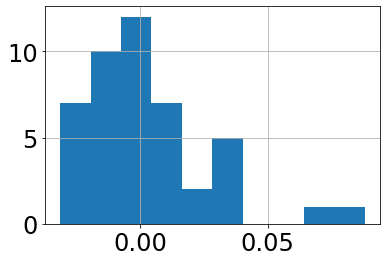

In [11]:
(unstacked["amr_residual"] - unstacked["plaintext"]).hist()

<AxesSubplot:>

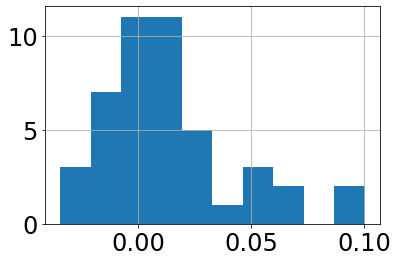

In [12]:
(unstacked["dep_residual"] - unstacked["plaintext"]).hist()